# 📘 Smart Service Classifier - Jupyter Notebook

End-to-end ML pipeline for classifying client inquiries into service categories.

In [1]:

import pandas as pd
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Load dataset
df = pd.read_csv("inquiries.csv")
df.head()


,text,label
0,Create a blog platform for my content,Web Development
1,Can you manage our agile workflow?,Project Management
2,Need AI for predictive analytics,AI Solutions
3,Build a chatbot for customer support,AI Solutions
4,Create a brochure for our product,Graphic Design


In [3]:

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,text,label,clean_text
0,Create a blog platform for my content,Web Development,create a blog platform for my content
1,Can you manage our agile workflow?,Project Management,can you manage our agile workflow
2,Need AI for predictive analytics,AI Solutions,need ai for predictive analytics
3,Build a chatbot for customer support,AI Solutions,build a chatbot for customer support
4,Create a brochure for our product,Graphic Design,create a brochure for our product


In [4]:

X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


📊 Logistic Regression Performance
Accuracy: 1.0
F1 Score: 1.0
                    precision    recall  f1-score   support

       3D Modeling       1.00      1.00      1.00        19
      AI Solutions       1.00      1.00      1.00        22
    Graphic Design       1.00      1.00      1.00        21
Project Management       1.00      1.00      1.00        21
   Web Development       1.00      1.00      1.00        17

          accuracy                           1.00       100
         macro avg       1.00      1.00      1.00       100
      weighted avg       1.00      1.00      1.00       100



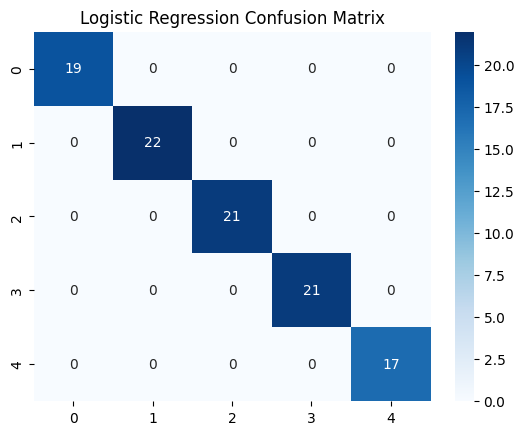

In [5]:

# Baseline model - Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

print("📊 Logistic Regression Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, average="weighted"))
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


📊 Random Forest Performance
Accuracy: 1.0
F1 Score: 1.0
                    precision    recall  f1-score   support

       3D Modeling       1.00      1.00      1.00        19
      AI Solutions       1.00      1.00      1.00        22
    Graphic Design       1.00      1.00      1.00        21
Project Management       1.00      1.00      1.00        21
   Web Development       1.00      1.00      1.00        17

          accuracy                           1.00       100
         macro avg       1.00      1.00      1.00       100
      weighted avg       1.00      1.00      1.00       100



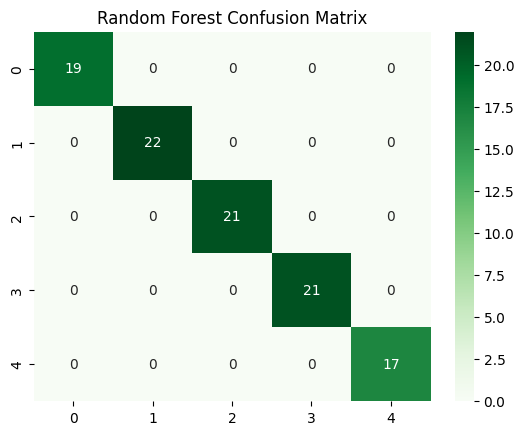

In [6]:

# Improved model - Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

print("📊 Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average="weighted"))
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [7]:

# Save the best model
final_model = rf if accuracy_score(y_test, y_pred_rf) > accuracy_score(y_test, y_pred_lr) else log_reg

pickle.dump(final_model, open("service_classifier.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

print("✅ Model and Vectorizer saved successfully!")


✅ Model and Vectorizer saved successfully!


In [9]:

# Test inference
sample = ["Create a blog platform for my content"]
vectorized = vectorizer.transform(sample)
prediction = final_model.predict(vectorized)[0]
confidence = final_model.predict_proba(vectorized).max() * 100

print("Inquiry:", sample[0])
print("Predicted Category:", prediction)
print("Confidence:", round(confidence, 2), "%")


Inquiry: Create a blog platform for my content
Predicted Category: Web Development
Confidence: 75.84 %
